Training data: (50000, 32, 32, 3) (50000,)
Testing data: (10000, 32, 32, 3) (10000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4568 - loss: 1.5000 - val_accuracy: 0.5976 - val_loss: 1.1514
Epoch 2/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6207 - loss: 1.0704 - val_accuracy: 0.6350 - val_loss: 1.0188
Epoch 3/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.6876 - loss: 0.8946 - val_accuracy: 0.7026 - val_loss: 0.8687
Epoch 4/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7315 - loss: 0.7718 - val_accuracy: 0.7200 - val_loss: 0.8241
Epoch 5/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7624 - loss: 0.6854 - val_accuracy: 0.7284 - val_loss: 0.7928
Epoch 6/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7885 - loss: 0.6015 - val_accuracy: 0.7352 - val_loss: 0.7988
Epoch 7/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8162 - loss: 0.5258 - val_accuracy: 0.7260 - val_loss: 0.8490
Epoch 8/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8358 - loss: 0.4692 - 

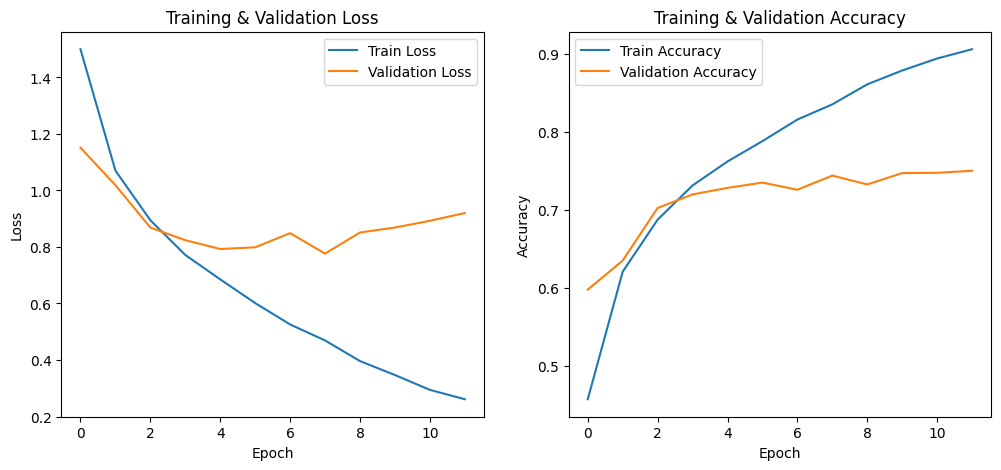

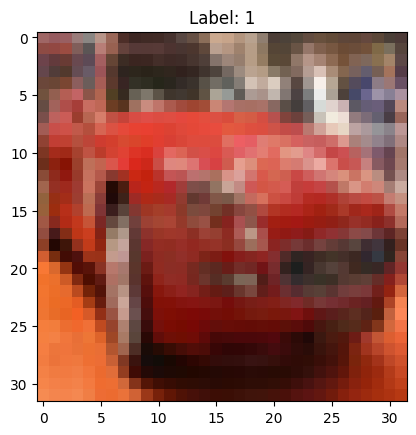

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


train_path = "/Users/akshay/Downloads/demo_dl/datasets1/CIFR(Ass2&3)/train_data.csv"
test_path  = "/Users/akshay/Downloads/demo_dl/datasets1/CIFR(Ass2&3)/test_data.csv"

# Load CSVs
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# Label is LAST column
y_train = train_df.iloc[:, -1].values
x_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
x_test = test_df.iloc[:, :-1].values

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# CNN needs 4-D shape: (samples, 32, 32, 3)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test  = x_test.reshape(-1, 32, 32, 3)

print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)


model = models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# c. Training the model

history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()



img = x_train[5].reshape(32, 32, 3)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")
plt.show()

